In [166]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from itertools import combinations

In [167]:
import csv
with open('../Project2/Dados_Trab2/line_list_tsantaki2.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        print(lines)

['lambda', 'EP', 'log_gf', 'ele', 'W', 'mult']
['4523.4', '3.65', '-1.871', 'FeI ', '44.2', '829']
['4537.67', '3.27', '-2.87', 'FeI ', '17.4', '594']
['4551.65', '3.94', '-1.928', 'FeI ', '29.1', '972']
['4556.93', '3.25', '-2.644', 'FeI ', '26.3', '638']
['4566.52', '3.3', '-2.156', 'FeI ', '46.2', '641']
['4574.22', '3.21', '-2.353', 'FeI ', '41', '554']
['4593.53', '3.94', '-1.921', 'FeI ', '29.5', '971']
['4596.41', '3.65', '-2.09', 'FeI ', '34.1', '823']
['4602.00', '1.61', '-3.163', 'FeI ', '72.2', '39']
['4630.12', '2.28', '-2.488', 'FeI ', '74.3', ' 115']
['4631.49', '4.55', '-1.89', 'FeI ', '11.6', '1152']
['4661.54', '4.56', '-1.186', 'FeI ', '38.5', '1207']
['4690.14', '3.69', '-1.55', 'FeI ', '58.8', '820']
['4802.88', '3.69', '-1.527', 'FeI ', '60.4', '888']
['4808.15', '3.25', '-2.63', 'FeI ', '27.7', ' 633']
['4809.94', '3.57', '-2.542', 'FeI ', '19.4', '793']
['4811.05', '3.07', '-3.182', 'FeI ', '14.5', '467']
['4885.43', '3.88', '-1.136', 'FeI ', '72.5', '966']
['496

In [168]:
import pandas as pd

dataframe = pd.read_csv('../Project2/Dados_Trab2/line_list_tsantaki2.csv')

In [169]:
dataframe.describe()

,lambda,EP,log_gf,W,mult
count,136.000000,136.000000,136.000000,136.000000,136.000000
mean,5732.017426,3.659853,-2.062868,46.316176,740.985294
std,680.977007,1.038007,1.085812,27.289507,482.271016
min,4508.280000,0.090000,-5.894000,5.100000,0.000000
25%,5260.372500,3.025000,-2.565500,22.400000,112.750000
50%,5784.500000,4.030000,-2.013000,43.450000,981.500000
75%,6221.152500,4.455000,-1.231250,66.425000,1161.000000
max,6864.320000,5.550000,-0.124000,154.300000,1327.000000


In [170]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lambda  136 non-null    float64
 1   EP      136 non-null    float64
 2   log_gf  136 non-null    float64
 3   ele     136 non-null    object 
 4   W       136 non-null    float64
 5   mult    136 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [171]:
dataframe.head()

,lambda,EP,log_gf,ele,W,mult
0,4523.40,3.65,-1.871,FeI,44.2,829
1,4537.67,3.27,-2.870,FeI,17.4,594
2,4551.65,3.94,-1.928,FeI,29.1,972
3,4556.93,3.25,-2.644,FeI,26.3,638
4,4566.52,3.30,-2.156,FeI,46.2,641


In [172]:
#dataframe.sort_values(by='EP', ascending=False, inplace=True

In [173]:
multipletos = [(13,16), (34,39), (62,64), (109,115), (205, 207), (594,641), (816,928), (959,982), (1005,1022), (1030,1064), (1084,1108), (1143,1147), (1159,1164), (1173,1181), (1194,1197), (1225, 1234), (1255,1260), (1314,1327)]

In [174]:
mult_13_16 = dataframe[(dataframe['mult'] >= 13) & (dataframe['mult'] <= 16)]
#mult_13_16.sort_values(by='EP', inplace=True)

In [175]:
mult_62_64 = dataframe[(dataframe['mult'] >= 816) & (dataframe['mult'] <= 928)]

In [176]:
mult_62_64

,lambda,EP,log_gf,ele,W,mult
0,4523.40,3.65,-1.871,FeI,44.2,829
7,4596.41,3.65,-2.090,FeI,34.1,823
12,4690.14,3.69,-1.550,FeI,58.8,820
13,4802.88,3.69,-1.527,FeI,60.4,888
18,4961.92,3.63,-2.301,FeI,26.7,845
21,5223.19,3.63,-2.252,FeI,29.4,880
23,5242.50,3.63,-1.124,FeI,86.7,843
26,5294.55,3.64,-2.627,FeI,15.5,875
29,5379.58,3.69,-1.552,FeI,61.2,928
46,5636.70,3.64,-2.511,FeI,19.8,868


In [177]:
y = np.log(mult_13_16['W'] / (mult_13_16['lambda']/1000))
x = mult_13_16['log_gf']

In [178]:
y_2 = np.log(mult_62_64['W'] / (mult_62_64['lambda']/1000))
x_2 = mult_62_64['log_gf']

In [179]:
y_2

0     2.279461
7     2.004022
12    2.528679
13    2.531773
18    1.682871
21    1.727886
23    2.805655
26    1.074162
29    2.431537
46    1.256383
90    2.592647
dtype: float64

In [180]:
def linear_function(x, m, b):
    return m * x + b

In [181]:
popt_1, pcov_1 = curve_fit(linear_function, x, y, p0=[8,25])

In [182]:
popt_2, pcov_2 = curve_fit(linear_function, x_2, y_2, p0=[8,25])

In [183]:
m_optimal, b_optimal = popt_1
x_model = np.linspace(min(x), max(x), 100)
y_model = linear_function(x_model, m_optimal, b_optimal)

In [184]:
m_optimal_2, b_optimal_2 = popt_2
x_model_2 = np.linspace(min(x_2), max(x_2), 100)
y_model_2 = linear_function(x_model_2, m_optimal_2, b_optimal_2)

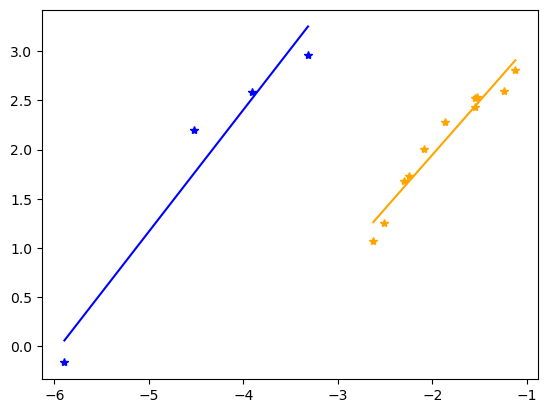

In [185]:
plt.plot(x, y, '*', color='blue')
plt.plot(x_model, y_model, color = 'blue')
plt.plot(x_2, y_2, '*', color='orange')
plt.plot(x_model_2, y_model_2, color = 'orange')
plt.show()

In [186]:
def growth_curve_og_opt_params(multiplets, dataframe):
    
    opt_params = []
    xx_list = []
    og_x = []
    og_y = []
    energy_pot = []

    for i in range(len(multiplets)):

        # Select multiplets and save original x and y
        multiplet = dataframe[(dataframe['mult'] >= multiplets[i][0]) & (dataframe['mult'] <= multiplets[i][1])]
        y = np.log(multiplet['W'] / (multiplet['lambda']/1000))
        x = multiplet['log_gf'] + np.log(multiplet['lambda']/1000)
        og_x.append(x)
        og_y.append(y)

        # Average Energy Potential for a multiplet
        energy_potential = np.mean(multiplet['EP'])
        energy_pot.append(energy_potential)
        
        # Save min and max of xx to then plot growth curve
        xx_list.append((min(x), max(x)))

        # Optimal parameters and covariance matrix
        popt, pcov = curve_fit(linear_function, x, y, p0=[5,15])
        m_optimal, b_optimal = popt

        opt_params.append((m_optimal, b_optimal))

    return opt_params, xx_list, og_x, og_y, energy_pot

        


In [187]:
opt_params, xx, org_x, org_y, energy_potential = growth_curve_og_opt_params(multipletos, dataframe=dataframe)

In [188]:
import matplotlib.cm as cm
def plot_growth_curves(optimal_params, xx_list, og_x, og_y):
    
    cmap = cm.get_cmap('tab20', len(optimal_params))
    for i in range(len(optimal_params)):
        color = cmap(i)
        m, b = optimal_params[i]
        x_min, x_max = xx_list[i]
        x_model = np.linspace(x_min, x_max, 100)
        y_model = linear_function(x_model, m, b)
        orig_x = og_x[i]
        orig_y = og_y[i]
        plt.plot(orig_x, orig_y, '*', color=color)
        plt.plot(x_model, y_model, color=color)
    plt.title("Growth Curves")
    plt.ylabel(r'log(W$\lambda$/$\lambda$)')
    plt.xlabel(r'log($gf\lambda$)')
    plt.show()

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_16412\1778069422.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(optimal_params))


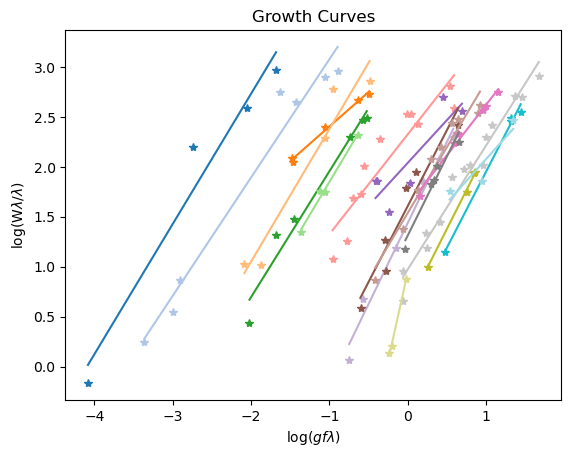

In [189]:
plot_growth_curves(opt_params, xx, org_x, org_y)

In [190]:
def pairwise_excitment_temperature(optimal_params, energy_potential):

    delta = np.sqrt((optimal_params[0][0] - optimal_params[1][0])**2 + (optimal_params[0][1] - optimal_params[1][1])**2) #Δ= sqrt( (m1​−m2​)^2+(b1​−b2​)^2 )
    ep_1 = energy_potential[0]
    ep_2 = energy_potential[1]

    t_exc = np.abs(5040 * (ep_1 -ep_2)) / delta
    
    return t_exc



In [191]:
multipletos_teste = [(13,16), (34,39)]
opt_params, xx, org_x, org_y, energy_potential = growth_curve_og_opt_params(multipletos_teste, dataframe=dataframe)

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_16412\1778069422.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(optimal_params))


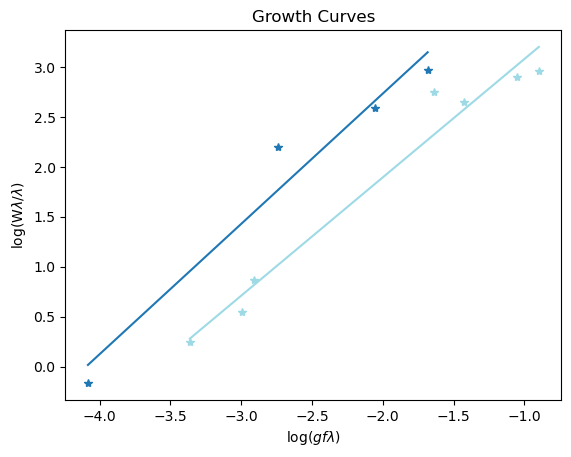

In [192]:
plot_growth_curves(optimal_params=opt_params, xx_list=xx, og_x=org_x, og_y=org_y)

In [193]:
opt_params

[(1.3037688680255572, 5.33964536950214),
 (1.1840504379696188, 4.261823859317546)]

In [194]:
energy_potential

[0.89, 2.0942857142857143]

In [195]:
t_exc = pairwise_excitment_temperature(opt_params, energy_potential)
t_exc

5596.938759644007

In [196]:
multipletos = [(13,16), (34,39), (62,64), (109,115), (205, 207), (594,641), (816,928), (959,982), (1005,1022), (1030,1064), (1084,1108), (1143,1147), (1159,1164), (1173,1181), (1194,1197), (1225, 1234), (1255,1260), (1314,1327)]

In [199]:
def find_solar_temperature_combinations(multiplets, dataframe, solar_temp=5780, tolerance=150):
    """
    Encontra combinações de múltiplos que geram uma temperatura de excitação próxima à temperatura solar.
    
    Parâmetros:
        multiplets (list): Lista de múltiplos.
        dataframe (pd.DataFrame): Dados contendo colunas 'mult', 'W', 'lambda', 'log_gf', e 'EP'.
        solar_temp (float): Temperatura solar alvo (K). Default: 5772 K.
        tolerance (float): Diferença máxima aceitável em Kelvin. Default: 100 K.
    
    Retorno:
        valid_combinations (list): Lista de combinações válidas [(multiplet_1, multiplet_2, T_exc), ...].
    """
    valid_combinations = []

    # Itera sobre todas as combinações de pares de múltiplos
    for comb in combinations(multiplets, 2):
        # Extrai os dois multipletos da combinação
        mult_1, mult_2 = comb
        
        # Calcula os parâmetros otimizados e potenciais de excitação para os dois múltiplos
        opt_params, _, _, _, energy_pot = growth_curve_og_opt_params([mult_1, mult_2], dataframe)
        
        # Calcula a temperatura de excitação para o par
        t_exc = pairwise_excitment_temperature(opt_params, energy_pot)
        
        # Verifica se a temperatura está dentro do intervalo aceitável
        if abs(t_exc - solar_temp) <= tolerance:
            valid_combinations.append((mult_1, mult_2, t_exc))
    
    return valid_combinations


valid_combinations = find_solar_temperature_combinations(multipletos, dataframe)


In [200]:
print(f"{len(valid_combinations)} Combinações válidas de multipletos e temperaturas de excitação:")
for mult_1, mult_2, t_exc in valid_combinations:
    print(f"Multipletos: {mult_1} e {mult_2} | T_exc: {t_exc:.2f} K")

5 Combinações válidas de multipletos e temperaturas de excitação:
Multipletos: (62, 64) e (1030, 1064) | T_exc: 5788.84 K
Multipletos: (205, 207) e (816, 928) | T_exc: 5795.97 K
Multipletos: (205, 207) e (1143, 1147) | T_exc: 5665.11 K
Multipletos: (205, 207) e (1314, 1327) | T_exc: 5667.88 K
Multipletos: (959, 982) e (1314, 1327) | T_exc: 5823.93 K
